In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


# Data Cleansing

In [6]:
df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [7]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [8]:
del df['PassengerId']

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [11]:
df.Transported = df.Transported.astype('int')
df.CryoSleep = df.CryoSleep.astype('int')
df.VIP = df.VIP.astype('int')

In [12]:
df.dtypes

HomePlanet       object
CryoSleep         int32
Cabin            object
Destination      object
Age             float64
VIP               int32
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported       int32
dtype: object

In [16]:
del df['Name']

In [17]:
df['Deck'] = df.Cabin.str.split('/').str[0]
df['Port'] = df.Cabin.str.split('/').str[-1]

In [18]:
del df['Cabin']

In [51]:
categorical = df.dtypes[df.dtypes=='object'].index
for c in categorical:
    print(df[c].nunique())
    print(df[c].unique()[:5])
    print()

3
['Europa' 'Earth' 'Mars']

3
['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']

8
['B' 'F' 'A' 'G' 'E']

2
['P' 'S']



In [21]:
df_train,df_test = train_test_split(df,test_size=1/3,random_state=1)

In [22]:
y_train = df_train.Transported.values
y_test = df_test.Transported.values

del df_train['Transported']
del df_test['Transported']

df_train.reset_index(inplace=True)
df_test.reset_index(inplace=True)

del df_train['index']
del df_test['index']

# EDA

In [42]:
df.Transported.value_counts()

1    3327
0    3279
Name: Transported, dtype: int64

In [55]:
df.Transported.value_counts(normalize=True)

1    0.503633
0    0.496367
Name: Transported, dtype: float64

In [108]:
transported_mean = df.Transported.mean()
transported_mean

0.5036330608537694

The data have a proportional balance between the transported and not transported

# Feature Importance 

In [46]:
from IPython.display import display

In [53]:
df_group = df[categorical]

In [70]:
for c in categorical:
    df_group = df.groupby(c).Transported.agg(['mean','count'])
    df_group['diff'] = df_group['mean'] - transported_mean
    df_group['risk'] = df_group['mean'] / transported_mean
    display(df_group)

,mean,count,diff,risk
HomePlanet,,,,
Earth,0.425687,3566,-0.077946,0.845233
Europa,0.659892,1673,0.156259,1.310264
Mars,0.515728,1367,0.012095,1.024015


,mean,count,diff,risk
Destination,,,,
55 Cancri e,0.622601,1407,0.118968,1.236220
PSO J318.5-22,0.505618,623,0.001985,1.003941
TRAPPIST-1e,0.466783,4576,-0.036850,0.926832


,mean,count,diff,risk
Deck,,,,
A,0.487923,207,-0.015710,0.968806
B,0.729299,628,0.225666,1.448077
C,0.679727,587,0.176094,1.349648
D,0.422460,374,-0.081173,0.838825
E,0.358712,683,-0.144921,0.712248
F,0.435409,2152,-0.068224,0.864536
G,0.521034,1973,0.017401,1.034551
T,0.500000,2,-0.003633,0.992786


,mean,count,diff,risk
Port,,,,
P,0.449862,3261,-0.053771,0.893234
S,0.556054,3345,0.052421,1.104085


# Feature Importance : Mutual Information

In [62]:
from sklearn.metrics import mutual_info_score

In [64]:
def mutual_info(series):
    return mutual_info_score(series,df.Transported)

In [107]:
mi = df[categorical].apply(mutual_info).sort_values(ascending=False)
mi

Deck           0.024093
HomePlanet     0.019240
Destination    0.007978
Port           0.005648
dtype: float64

<AxesSubplot:>

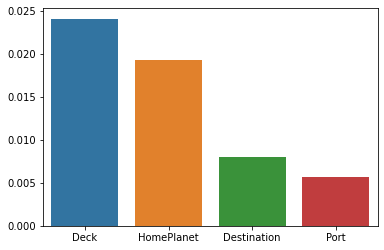

In [112]:
sns.barplot(x = mi.index,y = mi.values)

# Feature Importance : Correlation

In [96]:
# numerical = df.dtypes[df.dtypes!='object'].index
numerical = ['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck']
numerical

['CryoSleep',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck']

In [115]:
corr = df[numerical].corrwith(df.Transported)
corr

CryoSleep       0.462803
Age            -0.082553
VIP            -0.042260
RoomService    -0.247291
FoodCourt       0.055025
ShoppingMall    0.011602
Spa            -0.219854
VRDeck         -0.207950
dtype: float64

# Model

In [23]:
dict_train = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

test_dict = df_test.to_dict(orient='records')
X_test = dv.transform(test_dict)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [25]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_test)[:,1]
transport = (y_pred>=0.5).astype('int')

# Evaluation

In [26]:
(transport==y_test).mean()

0.7997275204359673

# Accuracy Score

In [27]:
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    score = accuracy_score(y_test, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.502
0.05 0.599
0.10 0.639
0.15 0.680
0.20 0.722
0.25 0.745
0.30 0.760
0.35 0.780
0.40 0.792
0.45 0.797
0.50 0.800
0.55 0.797
0.60 0.799
0.65 0.789
0.70 0.775
0.75 0.760
0.80 0.726
0.85 0.693
0.90 0.651
0.95 0.611
1.00 0.498


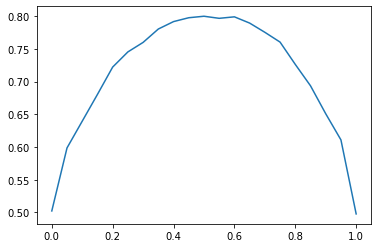

In [118]:
plt.plot(thresholds, scores)

Using 0.5 as the threshold give out the highest accuracy

# Precision and Recall

In [122]:
from sklearn.metrics import confusion_matrix,auc,roc_curve,classification_report

In [30]:
table = confusion_matrix(transport,y_test)
table

array([[825, 170],
       [271, 936]], dtype=int64)

In [31]:
p = table[0,0] / (table[0,0] + table[1,0])
p

0.7527372262773723

In [120]:
r = table[0,0] / (table[0,0] + table[0,1])
r

0.8291457286432161

In [124]:
print(classification_report(transport,y_test))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79       995
           1       0.85      0.78      0.81      1207

    accuracy                           0.80      2202
   macro avg       0.80      0.80      0.80      2202
weighted avg       0.80      0.80      0.80      2202



# ROC Curve

In [34]:
fpr,tpr,threshold = roc_curve(y_test,y_pred)
fpr = fpr[1:]
tpr = tpr[1:]
threshold = threshold[1:]

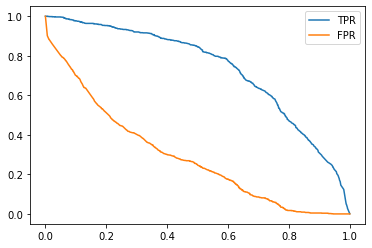

In [35]:
plt.plot(threshold, tpr, label='TPR')
plt.plot(threshold, fpr, label='FPR')
plt.legend()

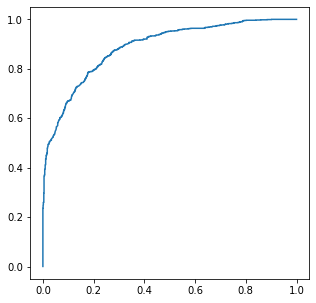

In [36]:
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr)

In [37]:
auc(fpr,tpr)

0.8874878730481383